## Feature Selection 

In [1]:
# Importation des Librairie
import pandas as pd
from sklearn.preprocessing import StandardScaler,RobustScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import LinearSVC,SVC
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.inspection import permutation_importance
warnings.filterwarnings('ignore')

sns.set()

In [2]:
#Chargement du Dataset
df = pd.read_excel('Heart.xlsx')

In [3]:
#Affichage des 5 premières lignes du Dataset
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [4]:
#Renomé une variable
df.rename(columns={'DEPRESSION ':'DEPRESSION'},inplace=True)

In [5]:
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


### Ecodagede des variable Qualitative

In [6]:
#Encodage
df['SEXE'] = df['SEXE'].map({"homme":1,"femme":0})
df['TDT'] = df['TDT'].map({'ASY':0,'DNA':1,'AA':2,'AT':3})
df['ECG'] = df['ECG'].map({'Normal':0,'LVH':1,'ST':2})
df['ANGINE'] = df['ANGINE'].map({'Oui':0,'Non':1})
df['PENTE'] = df['PENTE'].map({'Plat':0,'Ascendant':1,'Descendant':2})

### Normalisation des variable Qualitative

In [7]:
quant_cols = ['AGE','PAR','CHOLESTEROL','FCMAX','DEPRESSION']
robust = RobustScaler()
df[quant_cols] = robust.fit_transform(X=df[quant_cols].values)
y = df['CŒUR']
data = df.drop('CŒUR',axis=1)

In [8]:
data.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE
0,-1.076923,1,2,0.5,0.704000,0,0,0.944444,1,-0.400000,1
1,-0.384615,0,1,1.5,-0.458667,0,0,0.500000,1,0.266667,0
2,-1.307692,1,2,0.0,0.640000,0,2,-1.111111,1,-0.400000,1
3,-0.461538,0,0,0.4,-0.096000,0,0,-0.833333,0,0.600000,0
4,0.000000,1,1,1.0,-0.298667,0,0,-0.444444,1,-0.400000,1


### Division du Data en données d'Entrainement et de Test

In [9]:
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=10)

### Creation du Prémier model pour la selection de Variable

In [10]:
model = SVC(kernel='rbf', C=2,random_state=10)
model.fit(x_train,y_train)

SVC(C=2, random_state=10)

### Graphe de classification de l'importance des différentes variables dans le model

Text(0.5, 0, 'Importance')

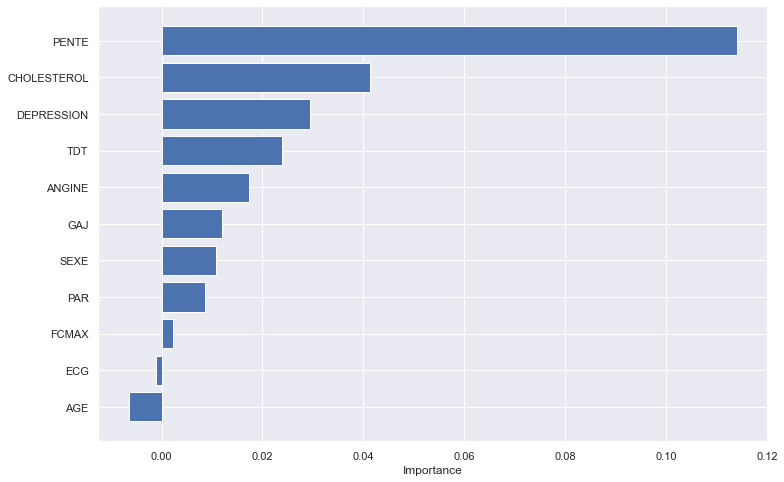

In [11]:
perm_importance = permutation_importance(model, x_test, y_test,random_state=10)
plt.figure(figsize=(12,8))
columns = x_test.columns
col = np.array(columns)
tri_cr = perm_importance.importances_mean.argsort()
plt.barh(col[tri_cr], perm_importance.importances_mean[tri_cr])
plt.xlabel("Importance")

### Liste des meilleurs variables selectionnées

In [12]:
impCol = ['PENTE','DEPRESSION','ANGINE','GAJ','TDT','ECG','CHOLESTEROL','ANGINE','GAJ','SEXE','PAR']

### Entrainemant du model avec le nombre de variable incrémenté a chaque fois

In [13]:
trainScoreList = []
testScoreList = []
featureQte = []
for col in list(impCol):
    featureQte.append(col)
    model.fit(x_train[featureQte],y_train)
    trainScoreList.append(model.score(x_train[featureQte],y_train))
    testScoreList.append(model.score(x_test[featureQte],y_test))

### Visualisation du score d'entrainement et de test en fonction du nombre de variable

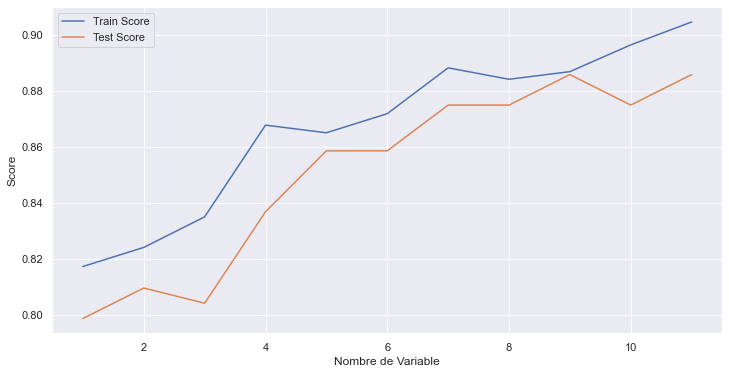

In [14]:
plt.figure(figsize=(12,6))
plt.xlabel('Nombre de Variable')
plt.ylabel('Score')
plt.plot(range(1,len(featureQte)+1),trainScoreList,label="Train Score")
plt.plot(range(1,len(featureQte)+1),testScoreList,label="Test Score")
plt.legend()
plt.show()

### Polynomiale feature

In [15]:
PF_df = data[impCol]

* Polynomiale Feature (Degré 2)

In [16]:
trans = PolynomialFeatures(degree=2)
PF_df = trans.fit_transform(PF_df)

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(PF_df,y,test_size=0.2,random_state=10)

In [18]:
pf_m = SVC(kernel='rbf', C=2,random_state=10)
pf_m.fit(X_train,Y_train)

SVC(C=2, random_state=10)

In [21]:
pf_m.score(X_train,Y_train)

0.9196185286103542

In [22]:
pf_m.score(X_test,Y_test)

0.875

* Polynomiale Feature (Degré 3)

In [23]:
trans_3 = PolynomialFeatures(degree=3)
PF_df_3 = trans_3.fit_transform(PF_df)

In [24]:
X_train_3,X_test_3,Y_train_3,Y_test_3 = train_test_split(PF_df_3,y,test_size=0.2,random_state=10)

In [25]:
pf_m.fit(X_train_3,Y_train_3)

SVC(C=2, random_state=10)

In [26]:
pf_m.score(X_train_3,Y_train_3)

0.6866485013623979

In [27]:
pf_m.score(X_test_3,Y_test_3)

0.657608695652174